In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import copy
import pandas as pd
#%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from scipy import stats
!pip install seaborn
import seaborn as sns

In [2]:
BodyBrain_stats = pd.read_csv('~/MSc_Thesis/experiments/BodyBrainQN_stats.csv')
BodyBrain_raw = pd.read_csv('~/MSc_Thesis/experiments/BodyBrainQN.csv')

In [3]:
BodyBrain_stats.head(25)

,Indicator,Best,Worst,Average,STD,Median,Generation,Run,Method
0,fitness,9.057629e-02,0.000000e+00,2.713468e-02,0.023349,3.178582e-02,1,1,QN-MOEA
1,morphology,-1.000000e+07,-1.000000e+07,-1.000000e+07,0.000000,-1.000000e+07,1,1,QN-MOEA
2,unaligned_novelty,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1,1,QN-MOEA
3,aligned_novelty,8.233734e-02,2.143299e-02,3.538690e-02,0.014831,3.325358e-02,1,1,QN-MOEA
4,gene_diversity,5.021236e+00,3.562090e+00,4.099654e+00,0.347313,4.011420e+00,1,1,QN-MOEA
5,control_gene_div,6.791632e+00,3.702458e+00,4.913947e+00,0.699827,4.826297e+00,1,1,QN-MOEA
6,morpho_gene_div,3.765990e+00,2.697792e+00,3.285361e+00,0.273798,3.232853e+00,1,1,QN-MOEA
7,morpho_div,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1,1,QN-MOEA
8,endpoint_div,8.980947e-02,3.341598e-02,4.820179e-02,0.015251,4.306652e-02,1,1,QN-MOEA
9,trayectory_div,1.224510e-01,3.866740e-02,5.665181e-02,0.021009,5.215163e-02,1,1,QN-MOEA


In [4]:
BodyBrain_stats.isnull().sum()

Indicator     0
Best          0
Worst         0
Average       0
STD           0
Median        0
Generation    0
Run           0
Method        0
dtype: int64

In [5]:
BodyBrain_raw.head(10)

,id,generation,run,md5,fitness,unaligned_novelty,aligned_novelty,gene_diversity,control_gene_div,morpho_gene_div,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
0,0,1,1,2f5e6549d406f0d2b1989d4919a85db3,0.041018,0.0,0.038006,3.821216,3.980650,3.661783,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.732056,3.773725,2.273843
1,1,1,1,65f920223fde124b34c67b1f1d374e04,0.031262,0.0,0.035602,3.812028,4.707445,2.916611,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.041880,4.148330,2.273843
2,2,1,1,5ab3dd38585d9993b0fa1a8c7f6a2219,0.039115,0.0,0.036063,4.346910,5.295437,3.398384,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,6.788769,6.167620,2.327004
3,3,1,1,9318f8fd880985e9c6d4668be397d44d,0.000000,0.0,0.022144,3.801821,4.640031,2.963611,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,8.387798,7.829881,2.273843
4,4,1,1,33836e630c181d0660fe1e6e6ce90429,0.035757,0.0,0.035569,4.355935,5.696488,3.015383,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.874584,3.980953,2.327004
5,5,1,1,9b8080d601335b905a1939f020e35b4d,0.039482,0.0,0.038868,4.705880,6.331409,3.080350,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.423027,4.616755,2.273843
6,6,1,1,b8b7be23d2e6caeaf18e3c460d3afe9a,0.009159,0.0,0.028456,4.163032,5.003588,3.322476,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,9.817893,9.315540,3.128891
7,7,1,1,b76704ae5d7956f2e7c019fdab617089,0.090576,0.0,0.079928,3.800042,3.868909,3.731174,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,6.560180,5.775205,3.037440
8,8,1,1,8d4e761dd4903da314a11d2d3c07df8c,0.017559,0.0,0.045029,4.428200,5.186003,3.670397,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.576168,4.731659,2.273843
9,9,1,1,04a1cfdc0c31946dd6fec6773a074000,0.038276,0.0,0.037253,3.921963,4.684058,3.159867,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,7.860526,5.625912,5.670266


In [6]:
BodyBrain_raw[BodyBrain_raw['fitness'] <= 0.5]

,id,generation,run,md5,fitness,unaligned_novelty,aligned_novelty,gene_diversity,control_gene_div,morpho_gene_div,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
0,0,1,1,2f5e6549d406f0d2b1989d4919a85db3,4.101798e-02,0.000000,0.038006,3.821216,3.980650,3.661783,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.732056,3.773725,2.273843
1,1,1,1,65f920223fde124b34c67b1f1d374e04,3.126226e-02,0.000000,0.035602,3.812028,4.707445,2.916611,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.041880,4.148330,2.273843
2,2,1,1,5ab3dd38585d9993b0fa1a8c7f6a2219,3.911505e-02,0.000000,0.036063,4.346910,5.295437,3.398384,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,6.788769,6.167620,2.327004
3,3,1,1,9318f8fd880985e9c6d4668be397d44d,0.000000e+00,0.000000,0.022144,3.801821,4.640031,2.963611,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,8.387798,7.829881,2.273843
4,4,1,1,33836e630c181d0660fe1e6e6ce90429,3.575664e-02,0.000000,0.035569,4.355935,5.696488,3.015383,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.874584,3.980953,2.327004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107362,16462,549,2,7afe29079af56f4b71f61021289f6126,1.348404e-01,6.577867,0.092837,4.073254,5.972282,2.174225,...,33.0,14,35,4.337745,17,24,4.626357,8.437137,3.935063,8.141012
107363,16463,549,2,801f66785339dec3adf7db8f5156bd3c,3.084847e-02,2.214417,0.020480,2.738200,4.018542,1.457858,...,3.0,14,35,4.337745,17,24,4.626357,9.355010,3.698265,8.867272
107367,16467,549,2,3f6c1f316f0c757cf3d0539cb468d1a8,3.037471e-07,2.214417,0.001341,2.712646,3.937000,1.488291,...,3.0,14,35,4.337745,17,24,4.626357,9.356861,4.186106,8.683951
107368,16468,549,2,76a9fb9149423ff83968193cbef3c2a3,9.973668e-03,6.942252,0.011283,2.887925,3.927970,1.847879,...,13.0,14,35,4.337745,17,24,4.626357,6.965834,3.809191,6.468892


In [7]:
BodyBrain_raw.isnull().sum()

id                         0
generation                 0
run                        0
md5                        0
fitness                    0
unaligned_novelty          0
aligned_novelty            0
gene_diversity             0
control_gene_div           0
morpho_gene_div            0
morpho_div                 0
endpoint_div               0
trayectory_div             0
inipoint_x                 0
inipoint_y                 0
inipoint_z                 0
endpoint_x                 0
endpoint_y                 0
endpoint_z                 0
trayectory_x               0
trayectory_y               0
trayectory_z               0
morphology_active          0
morphology_passive         0
control_cppn_nodes         0
control_cppn_edges         0
control_cppn_ws            0
morpho_cppn_nodes          0
morpho_cppn_edges          0
morpho_cppn_ws             0
simplified_gene_div        0
simplified_gene_ne_div     0
simplified_gene_nws_div    0
dtype: int64

In [10]:
#grouped_by_run = [x for _, x in BodyBrain_raw.groupby(BodyBrain_raw['id']%250000 == 0)]
partitioning_indexes = BodyBrain_raw.index[BodyBrain_raw['id'] % 250000 == 0].tolist()
grouped_by_run = [BodyBrain_raw.iloc[partitioning_indexes[i]:partitioning_indexes[i+1],:] for i in range(len(partitioning_indexes) - 1)]
for run in grouped_by_run:
    partitioning_indexes = run.index[run['id'] % 30 == 0].tolist()

In [11]:
run2 = grouped_by_run[0].copy()
run2.head(10)

,id,generation,run,md5,fitness,unaligned_novelty,aligned_novelty,gene_diversity,control_gene_div,morpho_gene_div,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
0,0,1,1,2f5e6549d406f0d2b1989d4919a85db3,0.041018,0.0,0.038006,3.821216,3.980650,3.661783,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.732056,3.773725,2.273843
1,1,1,1,65f920223fde124b34c67b1f1d374e04,0.031262,0.0,0.035602,3.812028,4.707445,2.916611,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.041880,4.148330,2.273843
2,2,1,1,5ab3dd38585d9993b0fa1a8c7f6a2219,0.039115,0.0,0.036063,4.346910,5.295437,3.398384,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,6.788769,6.167620,2.327004
3,3,1,1,9318f8fd880985e9c6d4668be397d44d,0.000000,0.0,0.022144,3.801821,4.640031,2.963611,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,8.387798,7.829881,2.273843
4,4,1,1,33836e630c181d0660fe1e6e6ce90429,0.035757,0.0,0.035569,4.355935,5.696488,3.015383,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.874584,3.980953,2.327004
5,5,1,1,9b8080d601335b905a1939f020e35b4d,0.039482,0.0,0.038868,4.705880,6.331409,3.080350,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.423027,4.616755,2.273843
6,6,1,1,b8b7be23d2e6caeaf18e3c460d3afe9a,0.009159,0.0,0.028456,4.163032,5.003588,3.322476,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,9.817893,9.315540,3.128891
7,7,1,1,b76704ae5d7956f2e7c019fdab617089,0.090576,0.0,0.079928,3.800042,3.868909,3.731174,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,6.560180,5.775205,3.037440
8,8,1,1,8d4e761dd4903da314a11d2d3c07df8c,0.017559,0.0,0.045029,4.428200,5.186003,3.670397,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.576168,4.731659,2.273843
9,9,1,1,04a1cfdc0c31946dd6fec6773a074000,0.038276,0.0,0.037253,3.921963,4.684058,3.159867,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,7.860526,5.625912,5.670266


In [12]:
run2.drop(['md5', 'id'], inplace=True, axis=1)

In [13]:
run2.head(5)

,generation,run,fitness,unaligned_novelty,aligned_novelty,gene_diversity,control_gene_div,morpho_gene_div,morpho_div,endpoint_div,...,morphology_passive,control_cppn_nodes,control_cppn_edges,control_cppn_ws,morpho_cppn_nodes,morpho_cppn_edges,morpho_cppn_ws,simplified_gene_div,simplified_gene_ne_div,simplified_gene_nws_div
0,1,1,0.041018,0.0,0.038006,3.821216,3.980650,3.661783,0.0,0.054121,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.732056,3.773725,2.273843
1,1,1,0.031262,0.0,0.035602,3.812028,4.707445,2.916611,0.0,0.046546,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,5.041880,4.148330,2.273843
2,1,1,0.039115,0.0,0.036063,4.346910,5.295437,3.398384,0.0,0.048498,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,6.788769,6.167620,2.327004
3,1,1,0.000000,0.0,0.022144,3.801821,4.640031,2.963611,0.0,0.034733,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,8.387798,7.829881,2.273843
4,1,1,0.035757,0.0,0.035569,4.355935,5.696488,3.015383,0.0,0.058945,...,-10000000.0,12,20,-1.584652,12,20,-0.543292,4.874584,3.980953,2.327004


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


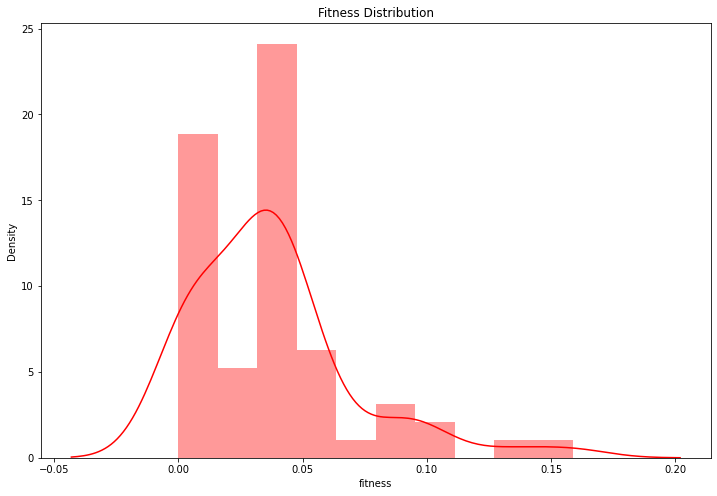

In [14]:
plt.figure(figsize=(12, 8))

sns.distplot(run2['fitness'], 
             color='red')

plt.title('Fitness Distribution')

plt.show()

<Figure size 864x576 with 0 Axes>

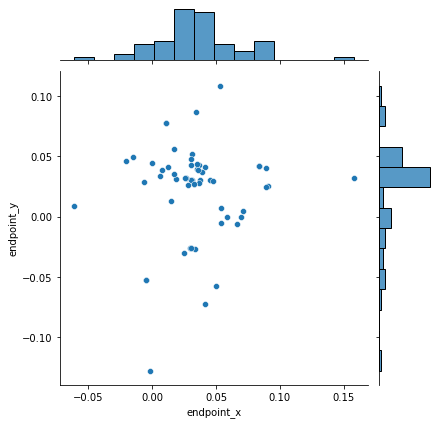

In [15]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2)

plt.show()

<Figure size 864x576 with 0 Axes>

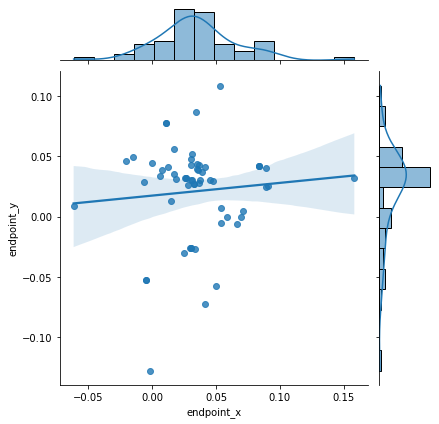

In [16]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='reg')

plt.show()

<Figure size 864x576 with 0 Axes>

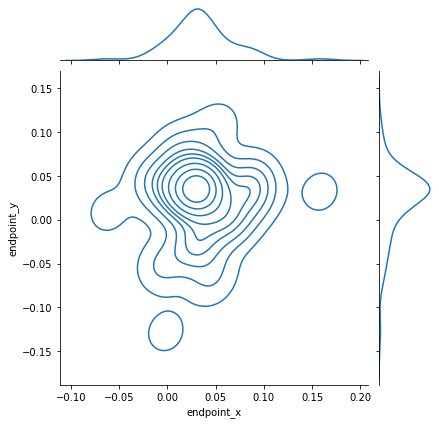

In [17]:
plt.figure(figsize=(12, 8))
sns.jointplot(x='endpoint_x', y='endpoint_y', 
              data=run2, kind='kde')
plt.show()

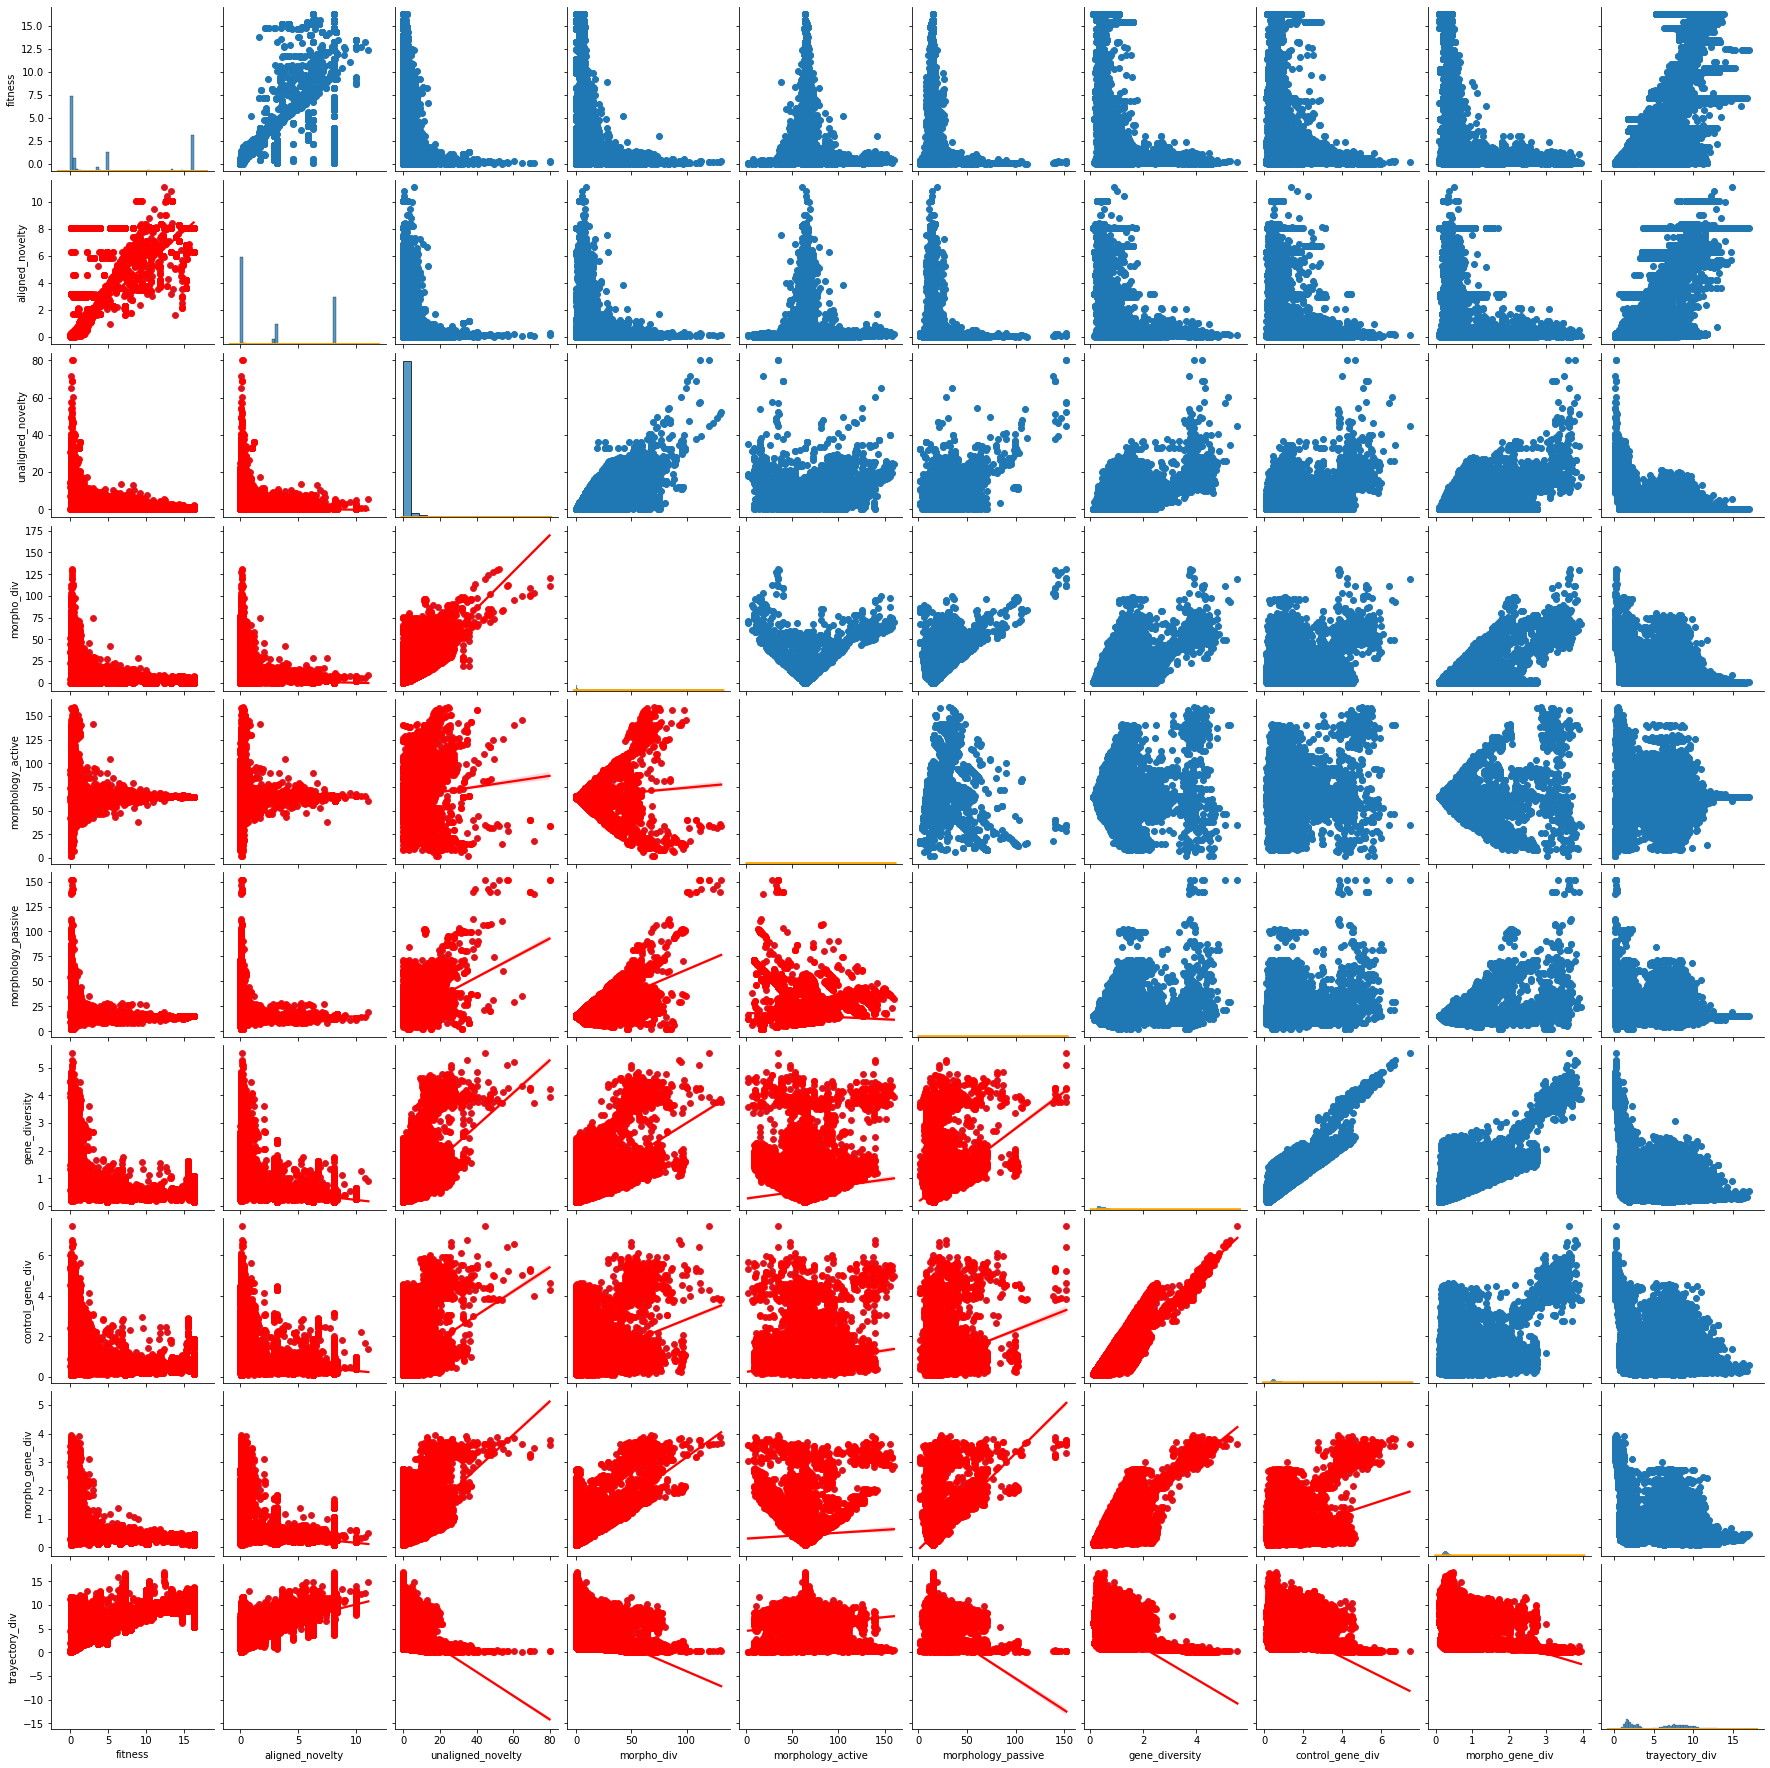

In [51]:
g = sns.pairplot(run2,
        vars=["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"])
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3, legend=False, color='orange')
g.map_lower(sns.regplot, color='red')
plt.show()

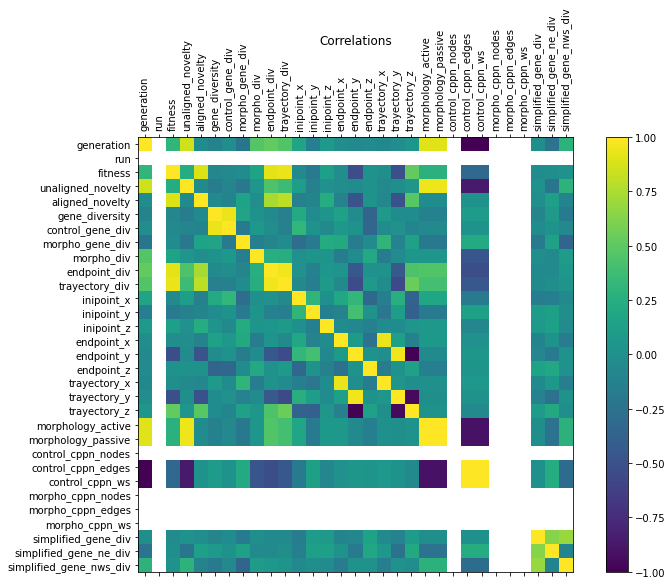

In [18]:
plt.figure(figsize=(12, 8))

plt.matshow(run2.corr(), 
            fignum=False, 
            aspect='equal')

columns = len(run2.columns)

plt.xticks(range(columns), run2.columns)
plt.yticks(range(columns), run2.columns)

plt.colorbar()
plt.xticks(rotation=90)
plt.title('Correlations', y=1.2)

plt.show()

In [19]:
run2[["fitness", "aligned_novelty", "unaligned_novelty", "morpho_div", "morphology_active", "morphology_passive", "gene_diversity", "control_gene_div", "morpho_gene_div", "trayectory_div"]].corr()

,fitness,aligned_novelty,unaligned_novelty,morpho_div,morphology_active,morphology_passive,gene_diversity,control_gene_div,morpho_gene_div,trayectory_div
fitness,1.000000,0.892661,0.239021,0.162563,0.275912,0.275911,-0.070731,-0.062078,-0.023813,0.939670
aligned_novelty,0.892661,1.000000,-0.051228,-0.020091,-0.025241,-0.025242,-0.043482,-0.100470,0.162387,0.801098
unaligned_novelty,0.239021,-0.051228,1.000000,0.044612,0.947293,0.947293,-0.161406,-0.090507,-0.199680,0.369878
morpho_div,0.162563,-0.020091,0.044612,1.000000,0.047094,0.047094,0.016416,0.063260,-0.133272,0.247150
morphology_active,0.275912,-0.025241,0.947293,0.047094,1.000000,1.000000,-0.122923,-0.055244,-0.190950,0.400409
morphology_passive,0.275911,-0.025242,0.947293,0.047094,1.000000,1.000000,-0.122924,-0.055245,-0.190950,0.400408
gene_diversity,-0.070731,-0.043482,-0.161406,0.016416,-0.122923,-0.122924,1.000000,0.937830,0.165738,-0.126142
control_gene_div,-0.062078,-0.100470,-0.090507,0.063260,-0.055244,-0.055245,0.937830,1.000000,-0.186861,-0.117207
morpho_gene_div,-0.023813,0.162387,-0.199680,-0.133272,-0.190950,-0.190950,0.165738,-0.186861,1.000000,-0.024011
trayectory_div,0.939670,0.801098,0.369878,0.247150,0.400409,0.400408,-0.126142,-0.117207,-0.024011,1.000000


In [20]:
fitness_stats = BodyBrain_stats[BodyBrain_stats['Indicator'] == 'fitness']
fitness_stats.head(10)

,Indicator,Best,Worst,Average,STD,Median,Generation,Run,Method
0,fitness,0.090576,0.000000,0.027135,0.023349,0.031786,1,1,QN-MOEA
37,fitness,0.158921,0.000580,0.047341,0.036453,0.038835,2,1,QN-MOEA
74,fitness,0.090576,0.000000,0.027135,0.023349,0.031786,1,1,QN-MOEA
111,fitness,0.147541,0.000580,0.047192,0.035868,0.036980,2,1,QN-MOEA
148,fitness,0.148610,0.000446,0.048846,0.041846,0.040823,3,1,QN-MOEA
185,fitness,0.392097,0.000446,0.062640,0.076964,0.041198,4,1,QN-MOEA
222,fitness,0.556262,0.000446,0.078332,0.110461,0.035616,5,1,QN-MOEA
259,fitness,0.259796,0.000446,0.070526,0.059527,0.053611,6,1,QN-MOEA
296,fitness,0.556262,0.014614,0.132260,0.131684,0.107882,7,1,QN-MOEA
333,fitness,0.515545,0.010277,0.094937,0.098366,0.069097,8,1,QN-MOEA


/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/leguiart/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


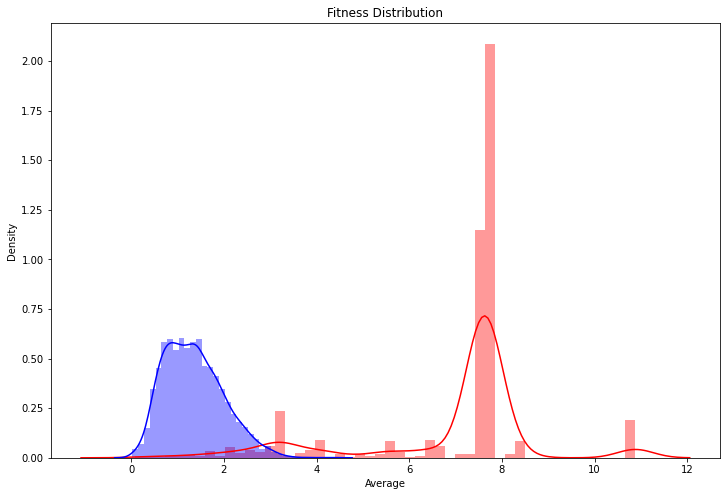

In [21]:
run1 = fitness_stats[fitness_stats['Run'] == 1]

plt.figure(figsize=(12, 8))

sns.distplot(run1['Best'], 
             color='red')

sns.distplot(run1['Average'], 
             color='blue')

plt.title('Fitness Distribution')

plt.show()

Text(0.5, 1.0, 'Generation')

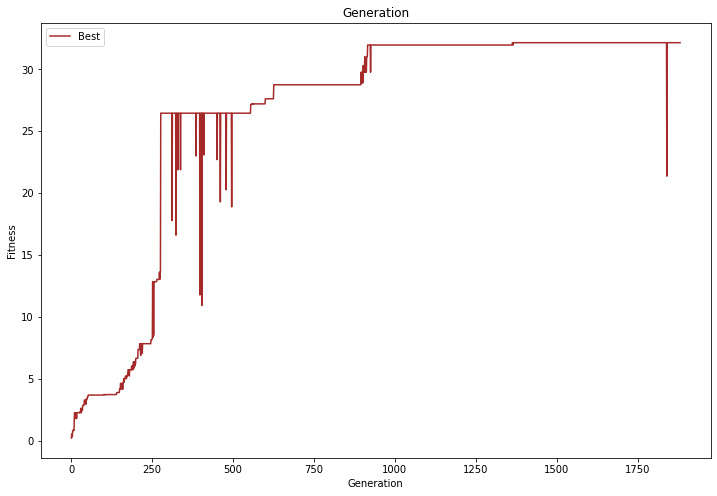

In [17]:
run1.plot(x='Generation', y='Best', 
                    figsize=(12, 8), color='brown')

plt.ylabel('Fitness')
plt.title('Generation')

In [52]:


def tsplot(ax, data,**kw):
    x = np.arange(data.shape[1])
    est = np.median(data, axis=0)
    sd = np.std(data, axis=0)
    cis = (est - sd, est + sd)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)



In [114]:
fitness_max_mat = []
fitness_median_mat = []
fitness_mean_mat = []
for i in range(19):
    run_i = fitness_stats[fitness_stats['Run'] == i + 1][:5000]
    fitness_max_mat += [run_i['Best'].tolist()]
    #fitness_median_mat += [run_i['Median'].tolist()]
    fitness_mean_mat += [run_i['Average'].tolist()]
    


In [115]:
fitness_max_mat = np.array(fitness_max_mat)
fitness_median_mat = np.array(fitness_median_mat)
fitness_mean_mat = np.array(fitness_mean_mat)

In [116]:
fitness_max_mat.shape

(19, 5000)

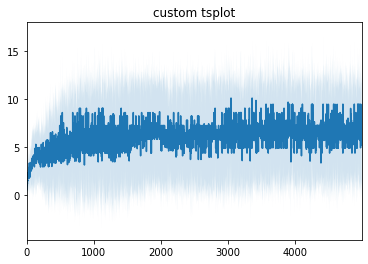

In [117]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

tsplot(ax2, fitness_max_mat)

ax2.set_title("custom tsplot")

plt.show()

In [120]:



def bootstrap(data, n_boot=10000, ci=68):
    boot_dist = []
    for i in range(int(n_boot)):
        resampler = np.random.randint(0, data.shape[0], data.shape[0])
        sample = data.take(resampler, axis=0)
        boot_dist.append(np.mean(sample, axis=0))
    b = np.array(boot_dist)
    s1 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.-ci/2.)
    s2 = np.apply_along_axis(stats.scoreatpercentile, 0, b, 50.+ci/2.)
    return (s1,s2)
    
def tsplotboot(ax, data,ci = 68, **kw):
    x = np.arange(data.shape[1])
    est = np.mean(data, axis=0)
    cis = bootstrap(data, ci = ci)
    ax.fill_between(x,cis[0],cis[1],alpha=0.2, **kw)
    ax.plot(x,est,**kw)
    ax.margins(x=0)

Text(0.5, 1.0, 'custom tsplot bootstrapped')

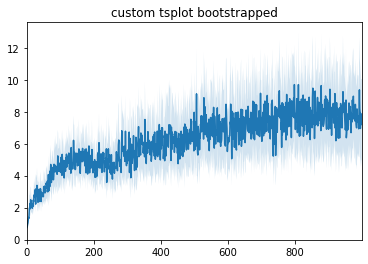

In [133]:
fig, (ax2) = plt.subplots(ncols=1, sharey=True)

#tsplot(ax, fitness_max_mat)
tsplotboot(ax2, fitness_max_mat[:, :1000], ci=95)
#ax.set_title("custom tsplot")
ax2.set_title("custom tsplot bootstrapped")

In [3]:
pareto_plot = np.array([[-1.81857872e-01, -5.44203700e+01],
       [-1.09865479e-01, -3.76353661e+01],
       [-6.86816755e-02, -4.32262828e+01],
       [-7.56706319e-02, -3.83155649e+01],
       [-2.40783407e-03, -4.97955685e+01],
       [-9.42919415e-02, -2.88027141e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.84176045e-03, -3.28258762e+01],
       [-4.35436653e-02, -2.97728957e+01],
       [-1.56684493e-01, -3.33987600e+01],
       [-4.41154936e-02, -5.87815413e+01],
       [-1.26900164e-01, -5.24887079e+01],
       [-8.75455504e-02, -3.02819983e+01],
       [-8.14415198e-03, -3.35656170e+01],
       [-1.11555243e-01, -3.93111248e+01],
       [-5.04116758e-02, -3.31386835e+01],
       [-7.73227366e-02, -4.20198469e+01],
       [-1.86508003e-01, -6.88610416e+01],
       [-1.05595129e-01, -6.59654790e+01]])

In [5]:
ids = np.array([3, 0, 1, 4, 6, 2, 9, 7, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], np.int64)
[3, 0, 1, 4, 6, 9, 7, 2, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [6]:
pareto_plot = np.column_stack((ids, pareto_plot))

In [7]:
pareto_plot = pd.DataFrame(pareto_plot, columns = ['id', 'fitness', 'novelty'])

In [8]:
pareto_plot

,id,fitness,novelty
0,3.0,-0.181858,-54.420370
1,0.0,-0.109865,-37.635366
2,1.0,-0.068682,-43.226283
3,4.0,-0.075671,-38.315565
4,6.0,-0.002408,-49.795569
5,2.0,-0.094292,-28.802714
6,9.0,-0.087546,-30.281998
7,7.0,-0.050412,-33.138683
8,5.0,-0.007842,-32.825876
9,8.0,-0.043544,-29.772896


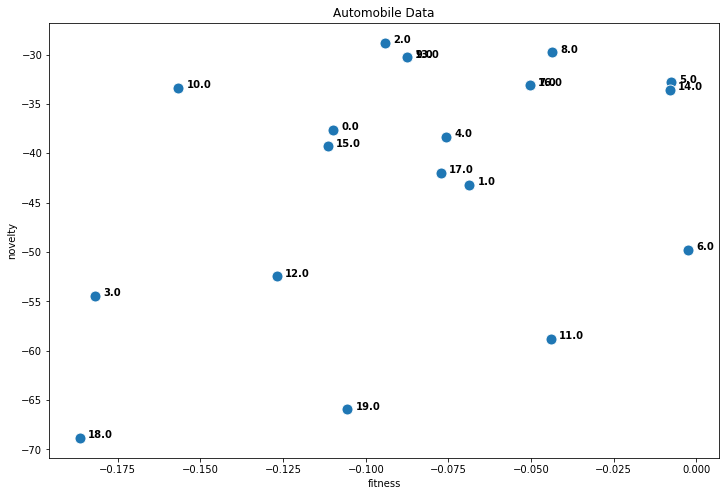

In [9]:
plt.figure(figsize=(12, 8))

p1 = sns.scatterplot(x='fitness', y='novelty', 
                data=pareto_plot, s=120)

for line in range(0,pareto_plot.shape[0]):
     p1.text(pareto_plot.fitness[line]+0.0025, pareto_plot.novelty[line], 
     pareto_plot.id[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.title('Automobile Data')

plt.show()

In [12]:
survivors = pareto_plot.iloc[[18, 0, 19, 10, 12, 11, 2, 15, 17, 4], :]
survivors

,id,fitness,novelty
18,18.0,-0.186508,-68.861042
0,3.0,-0.181858,-54.420370
19,19.0,-0.105595,-65.965479
10,10.0,-0.156684,-33.398760
12,12.0,-0.126900,-52.488708
11,11.0,-0.044115,-58.781541
2,1.0,-0.068682,-43.226283
15,15.0,-0.111555,-39.311125
17,17.0,-0.077323,-42.019847
4,6.0,-0.002408,-49.795569


In [13]:
tournament_indexes = np.array([[6, 5],
       [0, 4],
       [9, 3],
       [8, 2],
       [1, 7],
       [3, 6],
       [7, 5],
       [2, 8],
       [9, 4],
       [1, 0]])

In [16]:
tournament_winners = np.array([5., 0., 9., 2., 1., 3., 5., 2., 4., 0.])

In [17]:
survivors.iloc[tournament_winners, :]

,id,fitness,novelty
11,11.0,-0.044115,-58.781541
18,18.0,-0.186508,-68.861042
4,6.0,-0.002408,-49.795569
19,19.0,-0.105595,-65.965479
0,3.0,-0.181858,-54.420370
10,10.0,-0.156684,-33.398760
11,11.0,-0.044115,-58.781541
19,19.0,-0.105595,-65.965479
12,12.0,-0.126900,-52.488708
18,18.0,-0.186508,-68.861042


In [ ]:
[array([ -0.19000361, -46.33960885]), 
 array([ -0.08229078, -53.23336948]), 
 array([ -0.18730336, -42.0751516 ]), 
 array([ -0.18300995, -46.33960885]), 
 array([-1.29223909e-02, -5.18158565e+01]), 
 array([ -0.17188319, -46.33960885]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([-2.18590892e-03, -5.05051646e+01]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.1624015 , -38.02066754]), 
 array([ -0.14479606, -49.13475351]), 
 array([ -0.18099036, -47.61097185]), 
 array([ -0.16056119, -49.13475351]), 
 array([-1.46980045e-03, -5.80607919e+01]), 
 array([ -0.06838493, -67.38136963]), 
 array([ -0.07364034, -51.48698217]), 
 array([ -0.08006517, -42.58700747]), 
 array([ -0.13552332, -43.60922584]), 
 array([ -0.14049073, -49.13475351]), 
 array([ -0.07647704, -53.51893148])]

In [1]:
[[0.1745799536087905, 54.42037004045381, 0.1290030682916371], [0.10609326883729446, 37.63536606148458, 0.20074988593763374], [0.0796577620325119, 43.226282773327924, 0.11434455465100764], [0.001886117759640692, 49.79556848063127, 0.09085349299056196], [0.09626681129774153, 30.281998259256277, 0.07137179747072088], [0.07436383382880075, 38.315564943463116, 0.0957906055212885], [0.07972661529975145, 28.802714126970297, 0.07188431771291624], [0.054134798284911544, 33.13868351127313, 0.07824960991358688], [0.008206027818623974, 32.82587619434412, 0.07151423339485782], [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

[[0.1745799536087905, 54.42037004045381, 0.1290030682916371],
 [0.10609326883729446, 37.63536606148458, 0.20074988593763374],
 [0.0796577620325119, 43.226282773327924, 0.11434455465100764],
 [0.001886117759640692, 49.79556848063127, 0.09085349299056196],
 [0.09626681129774153, 30.281998259256277, 0.07137179747072088],
 [0.07436383382880075, 38.315564943463116, 0.0957906055212885],
 [0.07972661529975145, 28.802714126970297, 0.07188431771291624],
 [0.054134798284911544, 33.13868351127313, 0.07824960991358688],
 [0.008206027818623974, 32.82587619434412, 0.07151423339485782],
 [0.04366107984291968, 29.772895736051876, 0.11138574329816604]]

In [2]:
[[0.1745799536087905, 38.422598964092586, 0.1015109247879249], [0.10609326883729446, 27.44048759983132, 0.16508518277566595], [0.0796577620325119, 30.3297765312161, 0.09300718489977867], [0.001886117759640692, 38.53554647545725, 0.07216547467624573], [0.09626681129774153, 19.425894753866817, 0.057052528022613694], [0.07436383382880075, 27.316762654613107, 0.08337605965697106], [0.07972661529975145, 19.71638870642372, 0.058746200822718794], [0.054134798284911544, 23.313816981475405, 0.06619935706110809], [0.008206027818623974, 21.119866034703364, 0.0571601274708769], [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

[[0.1745799536087905, 38.422598964092586, 0.1015109247879249],
 [0.10609326883729446, 27.44048759983132, 0.16508518277566595],
 [0.0796577620325119, 30.3297765312161, 0.09300718489977867],
 [0.001886117759640692, 38.53554647545725, 0.07216547467624573],
 [0.09626681129774153, 19.425894753866817, 0.057052528022613694],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106],
 [0.07972661529975145, 19.71638870642372, 0.058746200822718794],
 [0.054134798284911544, 23.313816981475405, 0.06619935706110809],
 [0.008206027818623974, 21.119866034703364, 0.0571601274708769],
 [0.04366107984291968, 20.20609320634022, 0.09237024592997171]]

In [3]:
[[0.18106390712030845, 38.422598964092586, 0.11167156463953791], [0.06557151817724394, 19.425894753866817, 0.06380974949081243], [0.12760615365963185, 21.588165482134986, 0.0822409969652915], [0.05415832740129964, 20.20609320634022, 0.09870898402233927], [0.007357861276525066, 21.119866034703364, 0.05711189068701966], [0.1112125401388089, 29.557427996172596, 0.1704897453225194], [0.09665016161184178, 19.71638870642372, 0.056966782203714636], [0.08210770100005006, 30.3297765312161, 0.0949991653904494], [0.044335347456731504, 22.167387244957084, 0.09252863727439026], [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]

[[0.18106390712030845, 38.422598964092586, 0.11167156463953791],
 [0.06557151817724394, 19.425894753866817, 0.06380974949081243],
 [0.12760615365963185, 21.588165482134986, 0.0822409969652915],
 [0.05415832740129964, 20.20609320634022, 0.09870898402233927],
 [0.007357861276525066, 21.119866034703364, 0.05711189068701966],
 [0.1112125401388089, 29.557427996172596, 0.1704897453225194],
 [0.09665016161184178, 19.71638870642372, 0.056966782203714636],
 [0.08210770100005006, 30.3297765312161, 0.0949991653904494],
 [0.044335347456731504, 22.167387244957084, 0.09252863727439026],
 [0.07436383382880075, 27.316762654613107, 0.08337605965697106]]